In [ ]:
!pip install ultralytics
!pip install ultralytics opencv-python matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

✅ Sample dataset downloaded!

0: 448x640 1 cat, 306.8ms
Speed: 5.7ms preprocess, 306.8ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:01<00:00, 132MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:27<00:00, 4446.41file/s]

Dataset download success ✅ (788.5s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:18<00:00, 263.26it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [21:12<00:00,  4.07s/it]


                   all       5000      36335      0.634      0.474      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.649      0.514      0.562      0.365
            motorcycle        159        367      0.715       0.58      0.659      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.833      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.376       0.21
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydran

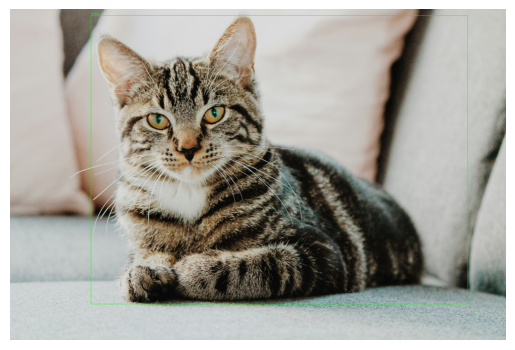

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

# Ensure dataset directories exist
categories = ["cat", "dog"]
os.makedirs("dataset/cat", exist_ok=True)
os.makedirs("dataset/dog", exist_ok=True)

# Sample images
image_urls = {
    "cat": [
        "https://images.unsplash.com/photo-1518791841217-8f162f1e1131",
        "https://images.unsplash.com/photo-1574158622682-e40e69881006"
    ],
    "dog": [
        "https://images.unsplash.com/photo-1560807707-8cc77767d783"
    ]
}

# Download images
def download_images():
    for category, urls in image_urls.items():
        for i, url in enumerate(urls):
            img_data = requests.get(url).content
            with open(f"dataset/{category}/{category}{i+1}.jpg", "wb") as handler:
                handler.write(img_data)
    print("✅ Sample dataset downloaded!")

download_images()

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Using the smallest YOLOv8 model

# Function to detect objects in an image and compute mAP metrics
def detect_objects_with_map(image_path, true_label):
    img = cv2.imread(image_path)
    results = model(img)  # Run YOLO detection
    detected_labels = []

    for result in results:
        for box in result.boxes:
            label = result.names[int(box.cls[0])]
            detected_labels.append(label.lower())
            confidence = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Compute mAP metrics
    metrics = model.val()
    print(f"\n✅ mAP50: {metrics.box.map50:.3f}")
    print(f"✅ mAP50-95: {metrics.box.map:.3f}")

    # Display the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

# Example usage
sample_image = "dataset/cat/cat1.jpg"
true_label = "cat"  # Expected label
detect_objects_with_map(sample_image, true_label)